# Interpolation 2024.3.11

### Jun & Maxwell GU & GPT

To evaluate the interpolating polynomial P on the $n + 1$ distinct points $(x_0,y_0) . . . , (x_n,y_n)$ for the function $$ f(x) = \frac{a}{x^2+a^2}$$

## Neville's Iterated Interpolation

In [113]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random

In [114]:
a = 1 # The parameter for the target function
h = 0.2 # The stepsize for the interpolation
n = 15 # The number of chosen points - 1

In [115]:
def func(x,a):
    return a/(x**2+a**2)

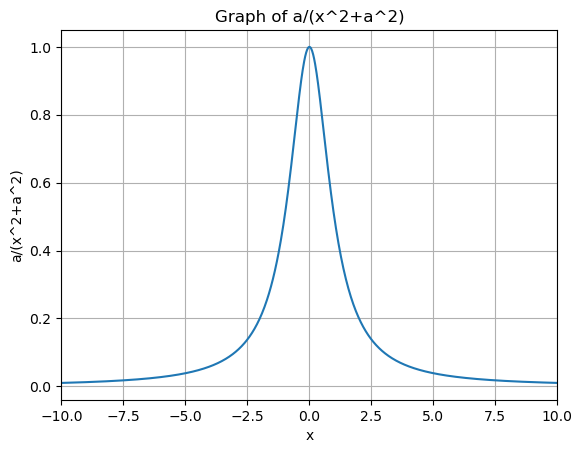

In [116]:
# Show the function
def function_plot(x,y):
    plt.plot(x, y)
    plt.xlim(-10,10)
    plt.title('Graph of a/(x^2+a^2)')
    plt.xlabel('x')
    plt.ylabel('a/(x^2+a^2)')
    plt.grid(True)
    plt.show()

# Show the target function
x = np.linspace(-10, 10, 1000)
y = func(x,a)

function_plot(x,y) # Plot the target function a/(x^2+a^2)

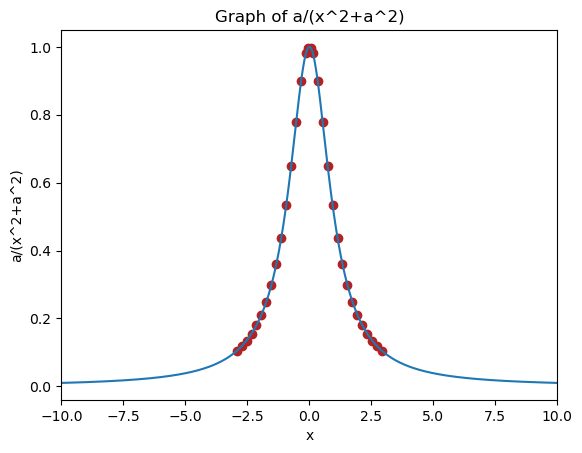

In [117]:
# Generate points on the target function

x_t = [0]*(2*n+2)
y_t = [0]*(2*n+2)
x_t[0] = random.uniform(0, 3-(n+1)*h)
y_t[0] = func(x_t[0],a)
for i in range(1,n+1):
    x_t[i] = x_t[i-1] + h
    y_t[i] = func(x_t[i],a)
for i in range(n+1,2*n+2):
    x_t[i] = -x_t[2*n+1-i]
    y_t[i] = y_t[2*n+1-i]

plt.plot(x, y)
plt.xlim(-10,10)
plt.title('Graph of a/(x^2+a^2)')
plt.xlabel('x')
plt.ylabel('a/(x^2+a^2)')
plt.scatter(x_t,y_t,color='firebrick')
plt.show()

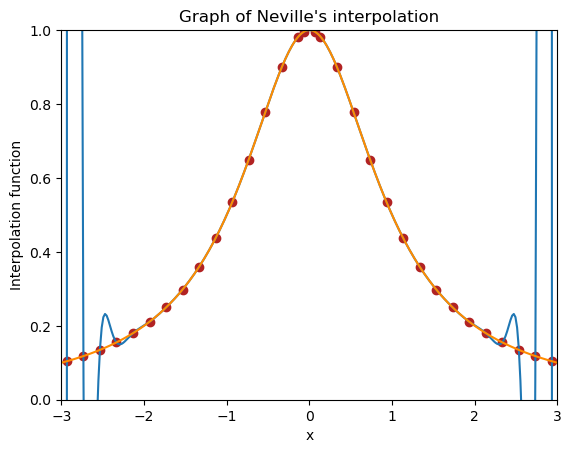

In [123]:
def divided_differences(x_values, y_values):
    n = len(x_values)
    F = np.zeros((n, n))  
    F[:, 0] = y_values  
    
    for j in range(1, n):
        for i in range(j, n):
            F[i, j] = (F[i, j - 1] - F[i - 1, j - 1]) / (x_values[i] - x_values[i - j])
    
    return F.diagonal()

def neville_interpolation(x_values, y_values, x):
    n = len(x_values)
    F = divided_differences(x_values, y_values)
    result = F[0]
    for i in range(1, n):
        term = F[i]
        for j in range(i):
            term *= (x - x_values[j])
        result += term
    return result

x_neville = np.linspace(-10,10,1000)
y_neville = neville_interpolation(x_t, y_t, x_neville)

plt.plot(x_neville, y_neville)
plt.plot(x,y,color = 'darkorange')
plt.xlim(-3,3)
plt.ylim(0,1)
plt.title('Graph of Neville\'s interpolation')
plt.xlabel('x')
plt.ylabel('Interpolation function')
plt.scatter(x_t,y_t,color='firebrick')
plt.show()